#### Consta de un pueto con un unico punto de desembarco,al cual llegan barcon en un intervalo de tiempo dado.

Los datos proporcionados corresponden a las variables:

1. Tiempo de llegada entre barcos : T
2. Tiempo de desembarque : Td  
  
  ####  INCOGNITAS:  
    
      
1. Tiempo de espera por cada barco : Te 
2. Tiempo inactividad : Ti
3. Cola más larga : C
4. Tiempo espera promedio : Te_prom
5. Tiempos por barco : Tb

In [20]:
import numpy  as np

#T = [50.,40.,70.,120.,130.]

#Td = [60.,50.,80.,90.,60.]




def Port(T,Td):
    
    N = len(T) #number of boats
    
    Te = [0.] #The first boat never waits

    Ti = [T[0]] #initial inactivity, which delays the first boat

    C = [0.]  #queue counter

    for i in range(1,N):

        if Td[i-1] > T[i]:Te += [Td[i-1] - T[i]]   
        
        else : 
            Te += [0.]

        if T[i] > Td[i-1]+Te[i-1]: Ti += [T[i]-Td[i-1]]
            
        else :  
            Ti += [0.]
        
        
        if Te[i] != 0.:  C += [1]

        else: 
            C+=[0.]
            

           
            
    return Te,Ti,C,np.array(Td)+np.array(Te),N

Te,Ti,C,Tb,N = Port(T,Td)

print('time per boat')
print(Tb)


print('wait time')
print(Te)

print('wait time average')
print(sum(np.array(Te))/N)
print('Inactivity time')
print(Ti)

print('maximum tail')
print(max(C))



time per boat
[ 50.  30.  90.]
wait time
[0.0, 0.0, 10]
wait time average
3.33333333333
Inactivity time
[70, 15, 0.0]
maximum tail
1


7
76.964154745 0.524283094901


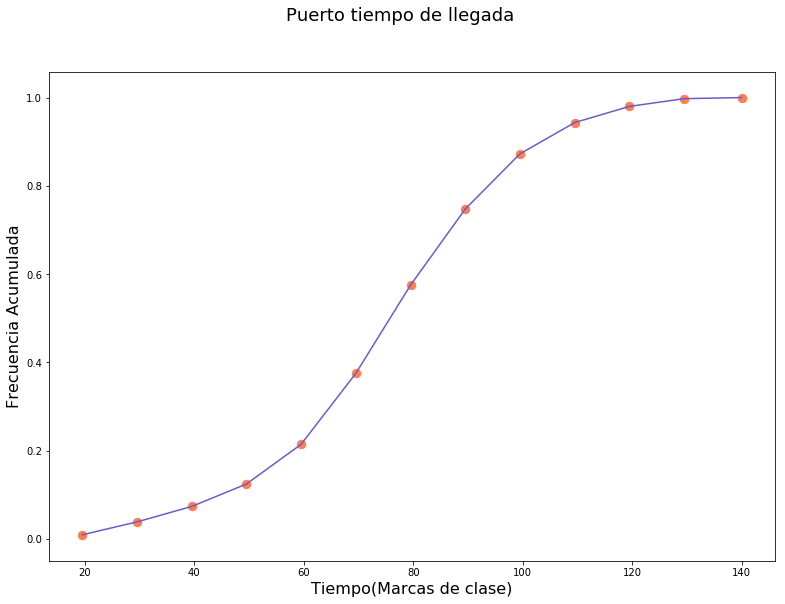

In [9]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import numpy
import random 
# Como se distribuye 

fig=plt.figure(figsize=(13,9))

'''Funcion de distribucion acumulada'''

# frecuencias(intervalo 0-1) vs intervalos 

#Tabla

"""15-24 11
25-34 35
35-44 42
45-54 61 
55-64 108
65-74 193
75-84 240
85-94 207
95-104 150
105-114  85
115-124  44
125-134  21 
135-145 3
total =1200
"""

fr = np.array([11,35,42,61,108,193,240,207,150,85,44,21,3])/1200.

intervalos = [(15,24),(25,34),(35,44),(45,54),(55,64),(65,74),(75,84),(85,94),(95,104),(105,114),(115,124),(125,134)\
              ,(135,145)]


marca = [(i[1]-i[0])/2.0 + i[0] for i in intervalos]

fa = [fr[0]]
for i in range(1,len(fr)):
    fa+=[fa[-1]+fr[i]]

plt.scatter(marca,fa,color='coral',s=70)
plt.plot(marca,fa,'slateblue')


# Tiempos 

#Ecuacion de la recta

ecuation = lambda x1,y1,x2,y2: ((y2-y1)*1.0/(x2-x1)*1.0,(-(y2-y1)/(x2-x1))*x1+y1)

eq = [ecuation(marca[i],fa[i],marca[i+1],fa[i+1]) for i in range(len(fa)-1)] #Lista de ecuaciones 
def Tiempo(y):
    
    
    if  y<fa[0]:
        m = (fa[0]/marca[0]) #de 0 a la primera marca 
        t = y/m
        print '1'
    if fa[0] <= y < fa[1] :
        t = (y-eq[0][1])/eq[0][0]
        print '2'
    if fa[1] <= y < fa[2] :
        t = (y-eq[1][1])/eq[1][0]
        print '3'
    if fa[2] <= y < fa[3] :
        print '4'
        t = (y-eq[2][1])/eq[2][0]
    if fa[3] <= y <fa[4] :
        t = (y-eq[3][1])/eq[3][0]
        print '5'
    if fa[4] <= y <fa[5] :
        t = (y-eq[4][1])/eq[4][0]
        print '6'
    if fa[5] <= y < fa[6] :
        t = (y-eq[5][1])/eq[5][0]
        print '7'
    if fa[6] <= y < fa[7] :
        t = (y-eq[6][1])/eq[6][0]
        print '8'
    if fa[7] <= y < fa[8] :
        t = (y-eq[7][1])/eq[7][0]
        print '9'
    if fa[8] <= y < fa[9] :
        t = (y-eq[8][1])/eq[8][0]
        print '10'
    if fa[9] <= y < fa[10] :
        t = (y-eq[9][1])/eq[9][0]
        print '11'
    if fa[10] <= y < fa[11] :
        t =(y-eq[10][1])/eq[10][0]
        print '12'
    if fa[11] <= y < fa[12]:
        t = (y-eq[11][1])/eq[11][0]
        print '13'
    return t
x=random.uniform(0,1)
print Tiempo(x),x

#plt.title("Tiempo-Frecuencia acumulada")
fig.suptitle(r'Puerto tiempo de llegada', fontsize=18)
plt.xlabel('Tiempo(Marcas de clase)', fontsize=16)
plt.ylabel('Frecuencia Acumulada', fontsize=16)



### Implementación metodo Montecarlo 

El metodo Montecarlo es utilizado para encontrar areas sobre la cuerva.

Consiste en determinar que puntos aleatorios estan dentro de la curva,dada por una función en un intervalo dado [a,b]. 

Area curva = ((b-a)(B-A)*m)/n donde B es f(b),A es f(a),m son los puntos dentro de la curva y n es el número total de puntos.





In [2]:
import random 

def f(x):
    return x**2





def Area_MonteCarlo(a,b,n):
    
    m = 0
    
    Area = [5] 
    
    for i in range(n):
        
       
        
        x = random.uniform(0,1)

        y = random.uniform(0,1)

        if y<f(x):
            m+=1
        
        Area += [((b-a)*(f(b)-f(a))*m)/(n*1.0)]
        
        #if abs(Area[i-1]-Area[i])< 0.01:
            
         #   break
    
    return Area[-1]
    
    
    
print Area_MonteCarlo(0,1,1000)
    

0.334


## Problema propuesto en clase:

Método montecarlo para figuras irregulares

Consiste en tirar puntos aleatoreos a un rectangulo de area conocida que delimite el poligono y hacer la relación :

Area_poligono = Area rectangulo*m/n   
m = puntos dentro poligono  
n = total de puntos.

### Para determinar m: 
Se dibuja una linea de un punto al infinito y si cruza el area que delimita el poligono,en este caso una vez,el punto esta adentro.

http://mathonweb.com/entrtain/monte/t_monte.htm



In [59]:
fa = [fr[0]]

print fa

0.0291666666667
0.035
0.0508333333333
0.09
0.160833333333
0.2
0.1725
0.125
0.0708333333333
0.0366666666667
0.0175
0.0025
[0.0091666666666666667, 0.03833333333333333, 0.073333333333333334, 0.12416666666666668, 0.21416666666666667, 0.375, 0.57499999999999996, 0.74749999999999994, 0.87249999999999994, 0.94333333333333325, 0.97999999999999987, 0.99749999999999983, 0.99999999999999978]
